<a href="https://colab.research.google.com/github/sw-woo/aiffel-test/blob/master/_9_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98(PyTorch)_%EA%B8%B0%EC%B4%88_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [ ]:
import torch

In [ ]:
torch.__version__

'1.10.0+cu111'

### 초기화 되지 않은 행렬 

In [ ]:
#4x2에 텐서가 만들어 지고 초기화가 안되어서 random 값이 들어가있다.
x = torch.empty(4,2)
print(x)

tensor([[2.8512e-19, 3.0827e-41],
        [2.3535e-23, 3.0827e-41],
        [3.3631e-44, 0.0000e+00],
        [       nan,        nan]])


### 무작위로 초기화된 행렬

In [ ]:
x = torch.rand(4,2)
print(x)

tensor([[0.9374, 0.2879],
        [0.8397, 0.5765],
        [0.6707, 0.6958],
        [0.3577, 0.4039]])


### dtype이 long, 0으로 채워진 텐서

In [ ]:
x = torch.zeros(4,2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [ ]:
x = torch.tensor([3,2.3])
print(x)

tensor([3.0000, 2.3000])


In [ ]:
x = x.new_ones(2, 4, dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [ ]:
x = torch.randn_like(x, dtype=torch.float32)
print(x)

tensor([[ 2.3523, -0.4041, -1.1266, -0.0026],
        [ 0.5707, -0.8808, -0.5384, -1.9825]])


### 텐서의 크기

In [ ]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [ ]:
print(x)

tensor([[ 2.3523, -0.4041, -1.1266, -0.0026],
        [ 0.5707, -0.8808, -0.5384, -1.9825]])


In [ ]:
y = torch.rand(2,4)
print(y)
print(x+y)

tensor([[0.3475, 0.7777, 0.5926, 0.5245],
        [0.6353, 0.3010, 0.5044, 0.2081]])
tensor([[ 2.6998,  0.3736, -0.5339,  0.5219],
        [ 1.2060, -0.5798, -0.0340, -1.7744]])


### 덧셈2

In [ ]:
print(torch.add(x,y))

tensor([[ 2.6998,  0.3736, -0.5339,  0.5219],
        [ 1.2060, -0.5798, -0.0340, -1.7744]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [ ]:
result = torch.empty(2,4)
torch.add(x,y, out=result)
print(result)

tensor([[ 2.6998,  0.3736, -0.5339,  0.5219],
        [ 1.2060, -0.5798, -0.0340, -1.7744]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [ ]:
print(x)
print(y)
y.add_(x)# y +=x
print(y)

tensor([[ 2.3523, -0.4041, -1.1266, -0.0026],
        [ 0.5707, -0.8808, -0.5384, -1.9825]])
tensor([[0.3475, 0.7777, 0.5926, 0.5245],
        [0.6353, 0.3010, 0.5044, 0.2081]])
tensor([[ 2.6998,  0.3736, -0.5339,  0.5219],
        [ 1.2060, -0.5798, -0.0340, -1.7744]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [ ]:
x = torch.Tensor([[1,3],
                 [5,4]])

y = torch.Tensor([[2,4],
                  [6,8]])

print(x - y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -4.]])
tensor([[-1., -1.],
        [-1., -4.]])
tensor([[-1., -1.],
        [-1., -4.]])


In [ ]:
print(x * y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 32.]])
tensor([[ 2., 12.],
        [30., 32.]])
tensor([[ 2., 12.],
        [30., 32.]])


In [ ]:
print(x / y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.5000]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.5000]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.5000]])


In [ ]:
# 내적(dot product) 행렬 곱 연산
x = torch.Tensor([[1,3],
                 [5,4]])

y = torch.Tensor([[2,4],
                  [6,8]])

print(torch.mm(x,y))

tensor([[20., 28.],
        [34., 52.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [ ]:
print(x)

tensor([[1., 3.],
        [5., 4.]])


In [ ]:
print(x[:,1])

tensor([3., 4.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [ ]:
x = torch.randn(4,5)
y = x.view(20)
z = x.view(5,-1)

print(x)
print(y)
print(z)

tensor([[ 0.4614,  0.5217, -0.0140,  0.1296, -0.2356],
        [-0.0097, -0.8066,  2.1219, -0.4460, -0.1925],
        [-0.2400,  0.8545,  0.7160,  0.0228,  0.6950],
        [-1.1819,  1.8190,  1.1259, -1.0540, -1.0356]])
tensor([ 0.4614,  0.5217, -0.0140,  0.1296, -0.2356, -0.0097, -0.8066,  2.1219,
        -0.4460, -0.1925, -0.2400,  0.8545,  0.7160,  0.0228,  0.6950, -1.1819,
         1.8190,  1.1259, -1.0540, -1.0356])
tensor([[ 0.4614,  0.5217, -0.0140,  0.1296],
        [-0.2356, -0.0097, -0.8066,  2.1219],
        [-0.4460, -0.1925, -0.2400,  0.8545],
        [ 0.7160,  0.0228,  0.6950, -1.1819],
        [ 1.8190,  1.1259, -1.0540, -1.0356]])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.1726])
0.17260661721229553
torch.float32


- 스칼라값 하나만 존재해야함 아니면 에러 발생

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([2.8440])
2.844014883041382
torch.float32


### squeeze 
- 차원을 축소(제거)

In [ ]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.8383, 0.9278, 0.5946],
         [0.4247, 0.2110, 0.2066],
         [0.6869, 0.3542, 0.7022]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.8383, 0.9278, 0.5946],
        [0.4247, 0.2110, 0.2066],
        [0.6869, 0.3542, 0.7022]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [ ]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.4913, 0.4319, 0.1919],
         [0.6936, 0.9970, 0.7170],
         [0.0528, 0.5039, 0.2166]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[[0.4913, 0.4319, 0.1919],
          [0.6936, 0.9970, 0.7170],
          [0.0528, 0.5039, 0.2166]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [ ]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))


tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [ ]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b),dim=0) #dim 을 지정해주어서 concatenate 할수 있음

print(c)
print(c.size())

tensor([[[[-0.2630,  0.8685, -0.0446],
          [-0.8090,  2.3118,  0.7826],
          [-0.4645, -0.3237,  1.4374]]],


        [[[ 0.5433, -1.2211, -0.6538],
          [ 0.8603,  0.2144, -1.8619],
          [ 0.2144, -0.7490, -0.2696]]]])
torch.Size([2, 1, 3, 3])


In [ ]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b),dim=0) #dim 을 지정해주어서 concatenate 할수 있음

print(c)
print(c.size())

tensor([[[-0.5492, -1.0009,  2.4349],
         [-0.3532, -1.0132, -1.3099],
         [ 0.0301, -1.1264, -0.0550]],

        [[ 0.5281, -0.4694, -1.2158],
         [ 0.6625, -1.0668,  0.6112],
         [ 0.7641, -1.3566,  0.3805]]])
torch.Size([2, 3, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [ ]:
tensor = torch.rand(3,6)
t1 , t2 , t3 = torch.chunk(tensor,3,dim=1)


print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.4626, 0.0887, 0.3786, 0.1701, 0.2679, 0.0998],
        [0.3688, 0.1602, 0.0256, 0.3634, 0.4460, 0.4145],
        [0.3209, 0.1048, 0.4590, 0.2345, 0.3142, 0.3070]])
tensor([[0.4626, 0.0887],
        [0.3688, 0.1602],
        [0.3209, 0.1048]])
tensor([[0.3786, 0.1701],
        [0.0256, 0.3634],
        [0.4590, 0.2345]])
tensor([[0.2679, 0.0998],
        [0.4460, 0.4145],
        [0.3142, 0.3070]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [ ]:
tensor = torch.rand(3,6)
t1 , t2  = torch.split(tensor,3,dim=1)

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.3979, 0.7244, 0.4657, 0.3653, 0.7872, 0.2820],
        [0.7031, 0.1882, 0.5719, 0.2839, 0.3980, 0.5139],
        [0.7554, 0.3563, 0.0394, 0.8340, 0.4337, 0.9739]])
tensor([[0.3979, 0.7244, 0.4657],
        [0.7031, 0.1882, 0.5719],
        [0.7554, 0.3563, 0.0394]])
tensor([[0.3653, 0.7872, 0.2820],
        [0.2839, 0.3980, 0.5139],
        [0.8340, 0.4337, 0.9739]])
tensor([[0.2679, 0.0998],
        [0.4460, 0.4145],
        [0.3142, 0.3070]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()` tensor -> numpy
  - `from_numpy()` numpy -> tensor

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()

In [ ]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out = a)

print(a)
print(b)


[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [ ]:
import torch

In [ ]:
x = torch.rand(1)
print(x)
print(x.item())
print(x.dtype)


tensor([0.8913])
0.8912689089775085
torch.float32


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y

print(device)
print(z)
print(z.to("cpu", torch.double))

cuda
tensor([1.8913], device='cuda:0')
tensor([1.8913], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [ ]:
import torch

In [ ]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5

print(y)


tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
print(y.grad_fn)

In [ ]:
z = y * y *2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [ ]:
a = torch.rand(3,3)
a = ((a * 3) / (a-1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b= (a*a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [ ]:
print(x.grad)

None


In [ ]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm()< 1000:
  y = y*2

print(y)

tensor([ 285.0137, 1102.4777, -254.5898], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1,1.0,0.0001],dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())


True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
import torch

In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print("a.data:",a)
print("a.grad:", a.grad)
print("a.grad:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad: None


- $b = a + 2$

In [ ]:
b = a + 2

print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [ ]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [ ]:
print("a.data:",a.data)
print("a.grad:", a.grad)
print("a.grad:", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad: None


In [ ]:
print("b.data:",b.data)
print("b.grad:", b.grad)
print("b.grad:", b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad: <AddBackward0 object at 0x7fa630e4cb50>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [ ]:
print("c.data:",c.data)
print("c.grad:", c.grad)
print("c.grad:", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad: <PowBackward0 object at 0x7fa63a21ec50>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [ ]:
print("out.data:",out.data)
print("out.grad:", out.grad)
print("out.grad:", out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad: <SumBackward0 object at 0x7fa630e4c650>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [ ]:
x = torch.ones(3 , requires_grad=True)
y = (x**2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [ ]:
grad = torch.Tensor([0.1,1,100])
z.backward(grad)

In [ ]:
print("x.data:",x.data)
print("x.grad:", x.grad)
print("x.grad:", x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad: None


In [ ]:
print("y.data:",y.data)
print("y.grad:", y.grad)
print("y.grad:", y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad: <PowBackward0 object at 0x7fa630e92650>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [ ]:
print("z.data:",z.data)
print("z.grad:", z.grad)
print("z.grad:", z.grad_fn)

z.data: tensor([2., 2., 2.])
z.grad: None
z.grad: <AddBackward0 object at 0x7fa6329bdcd0>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [ ]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [ ]:
m = nn.Conv2d(16,33,3,stride=2)

m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2))

m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2), dilation=(3,1))

input = torch.randn(20, 16, 50, 100)
print(input)
output = m(input)

tensor([[[[-1.0615e+00, -1.4783e-01,  1.0473e+00,  ...,  7.1682e-01,
            6.6808e-01,  1.6537e+00],
          [-6.9787e-01, -6.7483e-01,  8.5247e-01,  ...,  8.4984e-01,
           -4.9159e-01,  4.1479e-01],
          [-5.3170e-01,  1.6097e-01,  7.0747e-03,  ...,  7.0569e-02,
            1.0230e+00,  1.7408e+00],
          ...,
          [-1.7745e-01,  2.8871e-01,  2.6899e-01,  ...,  2.7770e-03,
            2.1024e-01,  1.6930e-01],
          [ 1.0967e+00, -9.2926e-01, -2.0534e+00,  ...,  2.4486e-01,
           -1.1015e+00, -1.7627e-01],
          [ 1.0313e+00,  4.8190e-01,  3.0745e-01,  ...,  8.0630e-02,
           -7.0561e-02,  7.5411e-01]],

         [[-1.1165e+00, -7.6788e-01, -1.5105e-02,  ..., -9.2007e-01,
           -8.0240e-01, -1.5309e+00],
          [ 2.2677e-01,  1.3647e+00,  8.5355e-01,  ...,  2.0922e+00,
            3.9061e-01,  1.0293e+00],
          [-6.0166e-01,  3.4701e-01, -2.6665e-01,  ...,  8.0142e-02,
           -1.1969e+00,  5.1003e-01],
          ...,
     

In [ ]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [ ]:
import torch
import torch.nn.functional as F 

- Convolution Layer 예시 (2)

In [ ]:
fillters = torch.randn(8, 4, 3, 3)

In [ ]:
inputs = torch.randn(1, 4,5,5)
conv = F.conv2d(inputs, fillters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,),std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [ ]:
trainset = torchvision.datasets.MNIST(root='/content',
                                      train = True,
                                      download = True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='/content',
                                      train = False,
                                      download = True,
                                      transform=transform)

In [ ]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [ ]:
image = torch_image.numpy()
image.shape

(28, 28)

In [ ]:
 label = labels[0].numpy()
 label.shape

()

In [ ]:
label

array(8)

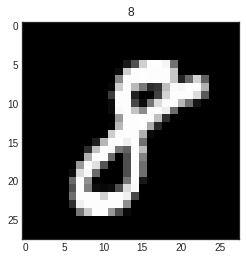

In [ ]:
plt.title(label)
plt.imshow(image,'gray')
plt.show()


## 각 Layer 설명

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [ ]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5,stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `weight`확인

---



In [ ]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [ ]:
weight = weight.detach()

weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

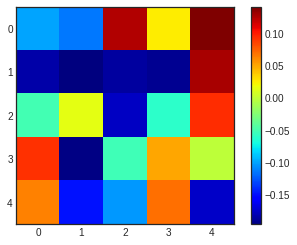

In [ ]:
plt.imshow(weight[0,0,:,:,],'jet')
plt.colorbar()
plt.show()

In [ ]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [ ]:
input_image = torch.unsqueeze(images[0], dim=0)

In [ ]:
output_data = layer(input_image)

In [ ]:
output = output_data.data

In [ ]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

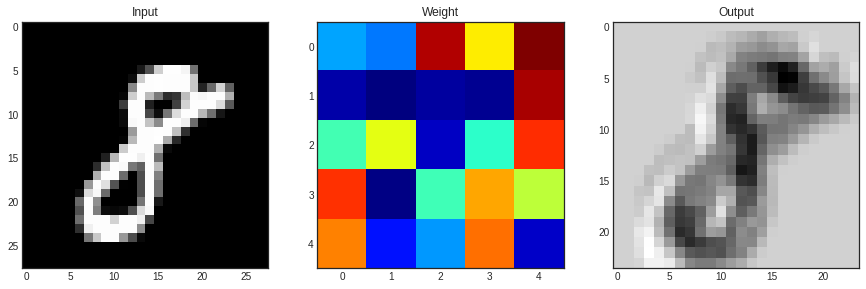

In [ ]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title("Input")
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0,0,:,:], 'jet')
plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [ ]:
image.shape

(28, 28)

In [ ]:
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [ ]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

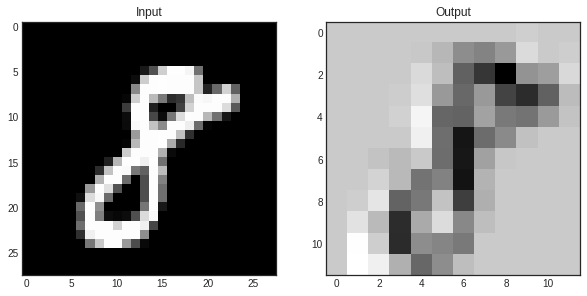

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title("Input")
plt.imshow(image,'gray')
plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0,0,:,:], 'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [ ]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [ ]:
flatten = image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [ ]:
flatten = image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [ ]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [ ]:
lin

tensor([[ 0.2569,  0.1290,  0.9792, -0.3691,  0.2521,  0.0932, -0.0195, -0.5394,
          0.4988,  0.3446]], grad_fn=<AddmmBackward0>)

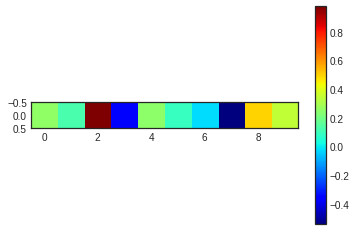

In [ ]:
plt.imshow(lin.detach().numpy(),'jet')
plt.colorbar()
plt.show()

### Softmax

In [ ]:
with torch.no_grad():
  flatten = image.view(1,28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin,dim=1)


In [ ]:
softmax

tensor([[0.2119, 0.0356, 0.1204, 0.0606, 0.0815, 0.0876, 0.0960, 0.1104, 0.0379,
         0.1580]])

In [ ]:
np.sum(softmax.numpy())

0.9999999

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [ ]:
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

